# **Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Loading Model*

In [3]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/project/Fruits_and_Vegetables_Recognition_System/model.h5')

# **Visualization and performing Prediction on single Image**

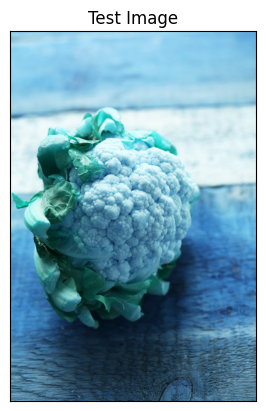

In [5]:
import cv2
image_path = "/content/drive/MyDrive/project/Fruits_and_Vegetables_Recognition_System/test/cauliflower/Image_1.jpg"
image = cv2.imread(image_path)
plt.imshow(image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# **Testing Model**

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
pred = cnn.predict(input_arr)

1/1 [==============================] - 0s 155ms/step


In [7]:
print(pred)

[[3.58993569e-13 1.07395155e-10 1.34865764e-16 4.97238015e-12
  1.85531608e-08 4.19508254e-17 3.32398254e-16 9.99999881e-01
  2.95879323e-15 1.17581942e-13 7.41724716e-13 4.55038160e-11
  6.63378250e-12 4.59922551e-12 1.06860222e-10 8.28606186e-14
  3.41149956e-11 1.33148302e-14 5.22445482e-08 6.51871439e-12
  4.46534892e-11 1.51936637e-14 2.08347606e-18 5.67581735e-13
  1.33246517e-12 7.28589584e-12 2.50258319e-16 1.34511532e-12
  1.63237642e-13 2.93937062e-11 2.15325262e-14 5.43385718e-16
  1.22781756e-15 4.76925607e-16 3.81351553e-13 8.92645333e-13]]


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/project/Fruits_and_Vegetables_Recognition_System/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [9]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
result_index = np.where(pred[0] == max(pred[0]))
print(result_index[0])

[7]


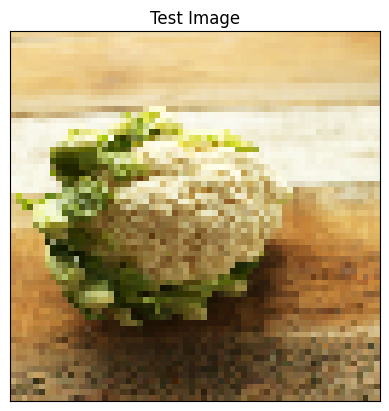

In [11]:
plt.imshow(image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# Single Prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a cauliflower
